# $S^3$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Data generation

In [ ]:
def make_sphere_S3(n_samples=250, R=1.0, noise=0.05):
    """
    Genera puntos uniformemente distribuidos en una 3-esfera (S^3) embebida en R^4.

    Parámetros:
    - n_samples: Número de puntos a generar.
    - R: Radio de la 3-esfera.
    - noise: Desviación estándar del ruido gaussiano añadido.

    Retorna:
    - data: Coordenadas (x1, x2, x3, x4) de los puntos en S^3 con ruido.
    """
    # Generar puntos aleatorios en S^3
    points = np.random.normal(size=(n_samples, 4))  # Puntos en R^4
    norms = np.linalg.norm(points, axis=1, keepdims=True)  # Normas de los puntos
    points = (points / norms) * R  # Normalizar al radio deseado

    # Añadir ruido
    noise_matrix = np.random.normal(0, noise, points.shape)
    data = points + noise_matrix

    return data

In [ ]:
# Generar la 3-esfera
data = make_sphere_S3(n_samples=250, R=1.0, noise=0.05)
print('Data dimension: {}'.format(data.shape))

Data dimension: (250, 4)


In [ ]:
# Visualizar las primeras filas
print(data[:5])

[[ 0.42865709  0.93015215  0.09294147 -0.02987045]
 [ 0.03909861 -0.52339873  0.76847835 -0.26874471]
 [-0.69308295 -0.7829579  -0.11849358  0.00560896]
 [-0.06101994 -0.72493411 -0.73774191 -0.00530738]
 [ 0.14956915  0.77787339  0.60791766  0.28970271]]



Visualize the data

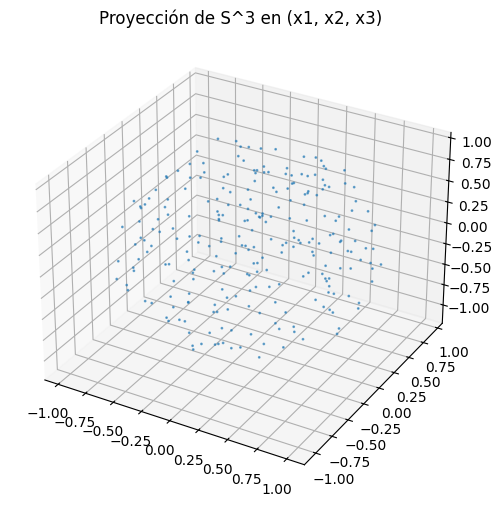

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Proyectar los puntos en el subespacio (x1, x2, x3)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=1, alpha=0.6)
ax.set_title("Proyección de S^3 en (x1, x2, x3)")
plt.show()

## Persistent Homology

In [ ]:
!pip install ripser
from ripser import Rips

Rips(maxdim=3, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 3min 22s, sys: 10.8 s, total: 3min 32s
Wall time: 3min 38s


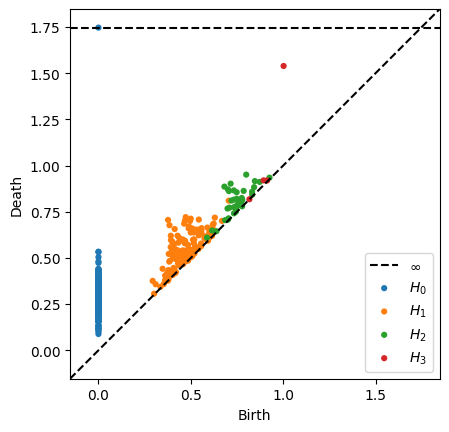

In [ ]:
%%time
rips = Rips(maxdim=3)
dgms = rips.fit_transform(data)
rips.plot(dgms)